### 숫자예측 모델(LSTM)

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [56]:
# 1. 데이터 생성 (랜덤 숫자 시퀀스)
data = np.array([i for i in range(1,21)]) # 1부터 20까지의 숫자
timesteps = 3 # 타임스텝 길이

In [57]:
x_data = []
y_data = []

In [58]:
# 타입스텝에 따라 입력 데이터와 출력 데이터 생성
for i in range(len(data) - timesteps):
  x_data.append(data[i:i+timesteps])
  y_data.append(data[i+timesteps])
  
x_data = np.array(x_data).reshape(-1, timesteps, 1)
y_data = np.array(y_data)

In [59]:
# 2. LSTM 모델 정의
model = Sequential([
    LSTM(10, input_shape=(timesteps, 1)),  # LSTM 레이어 (유닛: 10)
    Dense(1)  # 출력 레이어
])

c:\AiProject\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.compile(optimizer='adam', loss='mse')

In [61]:
# 3. 모델 학습
model.fit(x_data, y_data, epochs=1000, verbose=1)  # 100번 반복 학습

Epoch 1/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 170.4724
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 170.2877
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 170.1031
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 169.9189
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 169.7348
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 169.5509
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 169.3671
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 169.1835
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 169.0000
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 168.8166
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 168.6333
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 168.4500
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 168.2666
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 168.0833
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss

In [62]:
# 4. 예측 테스트
test_input = np.array([18, 19, 20]).reshape(1, timesteps, 1)  # 입력 예시
predicted_value = model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


In [63]:
# 결과 출력
print("입력 데이터:", test_input.flatten()) # flatten함수 : [[1,2],[3,4]] --> [1,2,3,4]
print("예측 값:", predicted_value[0][0])

입력 데이터: [18 19 20]
예측 값: 12.082763


### 기온예측 모델(RNN)

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [65]:
# 1. 데이터 로드
file_path = "dataset/jena_climate_2009.csv"
data = pd.read_csv(file_path)

In [66]:
# 데이터 확인
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [67]:
# 'T (degC)' 열이 기온 데이터
temperature = data['T (degC)'].values

In [68]:
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))  # 정규화
scaled_data = scaler.fit_transform(temperature.reshape(-1, 1))

In [69]:
# 데이터셋 생성 함수
def create_dataset(dataset, look_back=60):
  X, y = [], []
  for i in range(len(dataset) - look_back):
    X.append(dataset[i:i + look_back, 0])
    y.append(dataset[i + look_back, 0])
  return np.array(X), np.array(y)

In [70]:
look_back = 60  # 과거 60시간 데이터를 기반으로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # RNN 입력 형태

In [71]:
# 데이터 분리
train_size = int(len(X) * 0.8)  # 80% 학습 데이터
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [72]:
# 3. RNN 모델 구성
model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(X.shape[1], 1)),
    Dense(1)
])

c:\AiProject\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
# 4. 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0019 - val_loss: 2.6594e-04
Epoch 2/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.2829e-04 - val_loss: 3.5270e-04
Epoch 3/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.0659e-04 - val_loss: 8.9514e-05
Epoch 4/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 7.0168e-05 - val_loss: 8.6559e-05
Epoch 5/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 6.0731e-05 - val_loss: 6.7954e-05
Epoch 6/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 5.0348e-05 - val_loss: 6.3014e-05
Epoch 7/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 4.9955e-05 - val_loss: 5.8883e-05
Epoch 8/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.7504e-05 - val_loss: 8.7400e-05
Epoch 9/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.8291e-05 - val_loss: 8.3698e-05
Epoch 10/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.2936e-05 - val_loss: 5.6376e-05
Epoch 11/50
543/543 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.

In [75]:
# 5. 예측
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # 정규화 복원

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [76]:
# 실제 값 복원
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

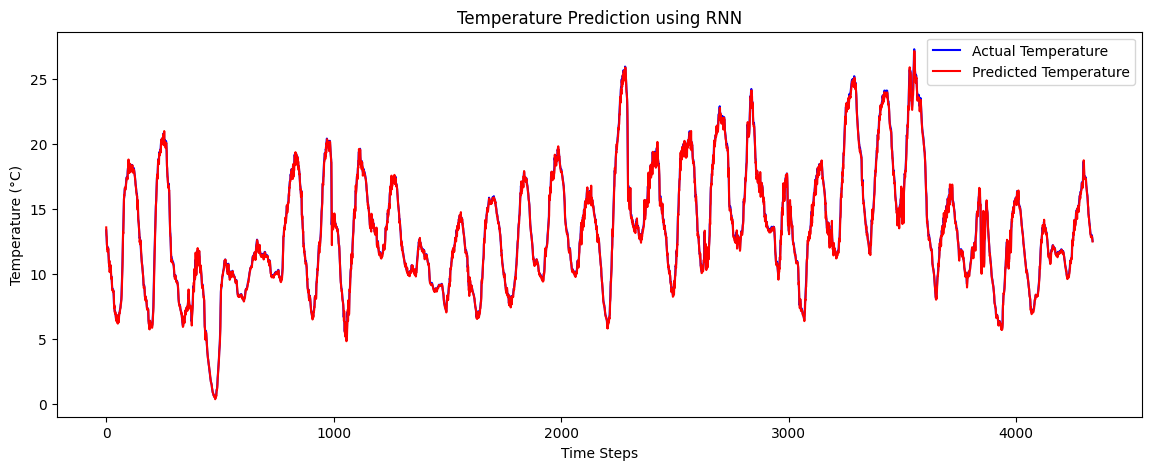

In [77]:
# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_values, label="Actual Temperature", color='blue')
plt.plot(predictions, label="Predicted Temperature", color='red')
plt.title('Temperature Prediction using RNN')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

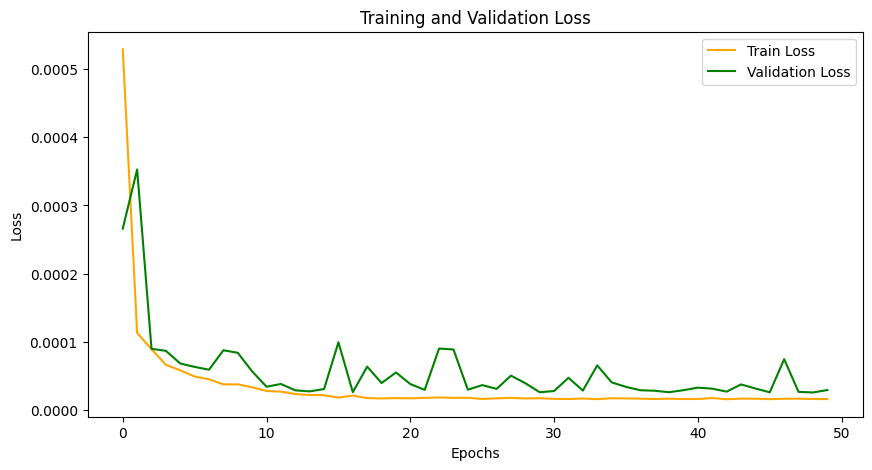

In [78]:
# 7. 학습 손실 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 주가예측 모델(LSTM)

In [79]:
# 증권데이터 수집 라이브러리 설치 :  pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [80]:
# 1. 데이터 수집
ticker = "AAPL"  # 예: 애플 주식
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[['Close']]  # 종가만 사용

[*********************100%***********************]  1 of 1 completed


In [81]:
data.head()

Price,Close
Ticker,AAPL
Date,
2015-01-02,24.347176
2015-01-05,23.661274
2015-01-06,23.663494
2015-01-07,23.995312
2015-01-08,24.917259


In [82]:
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [83]:
def create_dataset(dataset, look_back=60):
  X, y = [], []
  for i in range(len(dataset) - look_back):
    X.append(dataset[i:i + look_back, 0])
    y.append(dataset[i + look_back, 0])
  return np.array(X), np.array(y)

In [84]:
look_back = 60  # 과거 60일 데이터로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # LSTM 입력 형태

In [85]:
# 3. 모델 구성
model = Sequential([
  LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
  LSTM(50),
  Dense(1)
])

c:\AiProject\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
# 4. 모델 학습
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [88]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0164 - val_loss: 0.0017
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.0582e-04 - val_loss: 0.0016
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3.6721e-04 - val_loss: 0.0017
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3.7059e-04 - val_loss: 0.0015
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.2390e-04 - val_loss: 0.0012
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.0895e-04 - val_loss: 0.0011
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.5623e-04 - val_loss: 0.0012
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.7263e-04 - val_loss: 0.0013
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 3.7072e-04 - val_loss: 9.7867e-04
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.0572e-04 - val_loss: 0.0011
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.1215e-04 - val_loss: 8.5473e-04
Epoch 12/20
56/

In [89]:
# 5. 예측 및 시각화
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [90]:
# 실제 값 복원
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

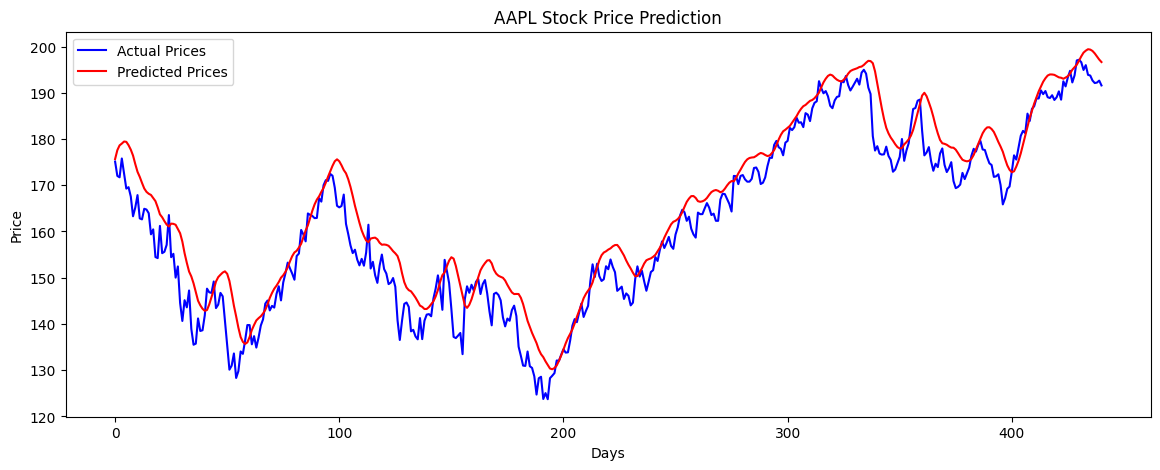

In [91]:
# 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

### 주가예측 모델(GRU)

In [92]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [93]:
# 1. 데이터 수집
ticker = "AAPL"  # 애플 주식
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[['Close']]  # 종가 데이터만 사용

[*********************100%***********************]  1 of 1 completed


In [94]:
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))  # 데이터를 0~1 사이로 정규화
scaled_data = scaler.fit_transform(data)

In [95]:
# GRU 모델에 적합한 데이터셋 생성 함수
def create_dataset(dataset, look_back=60):
  X, y = [], []
  for i in range(len(dataset) - look_back):
    X.append(dataset[i:i + look_back, 0])
    y.append(dataset[i + look_back, 0])
  return np.array(X), np.array(y)

In [96]:
look_back = 60  # 과거 60일 데이터로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # GRU 입력 형태

In [97]:
# 3. GRU 모델 구성
model = Sequential([
  GRU(50, return_sequences=True, input_shape=(X.shape[1], 1)),
  GRU(50),
  Dense(1)
])

c:\AiProject\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [98]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [99]:
# 4. 모델 학습
train_size = int(len(X) * 0.8)  # 80% 학습 데이터, 20% 테스트 데이터
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [100]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0344 - val_loss: 5.6982e-04
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.9944e-04 - val_loss: 5.1989e-04
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.4281e-04 - val_loss: 4.8080e-04
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.4850e-04 - val_loss: 5.5571e-04
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.3832e-04 - val_loss: 4.2417e-04
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 1.1347e-04 - val_loss: 4.0525e-04
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.3155e-04 - val_loss: 3.7704e-04
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.1520e-04 - val_loss: 4.9603e-04
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 1.2871e-04 - val_loss: 3.4732e-04
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.1875e-04 - val_loss: 3.4636e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 9.5068e-05 - 

In [101]:
# 5. 예측
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))  # 정규화 복원

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [102]:
# 실제 값 복원
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

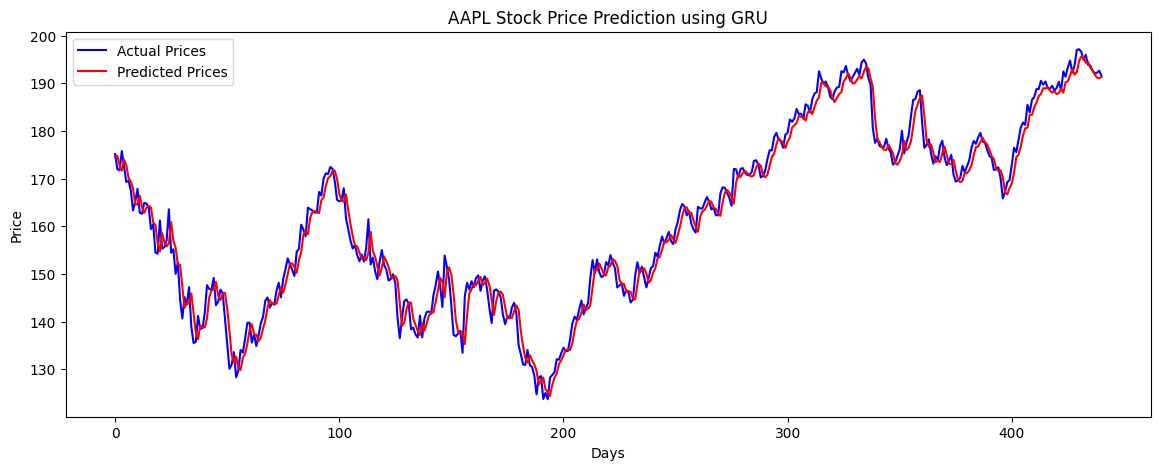

In [103]:
# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title(f'{ticker} Stock Price Prediction using GRU')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()